# **Solution to PSet 1**

> provided and graded by Xuntao Wu

[:material-download: Download this notebook](./sol1.ipynb)

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from datetime import datetime
from pytz import timezone

# Install and import QuTiP if needed
try:
    from qutip import *
except ImportError:
    %pip install qutip
    from qutip import *

# Configure matplotlib for LaTeX rendering
plt.rcParams.update(
    {
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsmath} \usepackage{physics}",
        "font.family": "serif",
    }
)
%config InlineBackend.figure_format = 'svg'

# Print version and execution time info
print(f"QuTiP version: {qutip.__version__}")
print(
    "Time of execution: ",
    datetime.now(timezone("America/Chicago")).strftime("%Y-%m-%d %H:%M:%S"),
)

QuTiP version: 5.1.1
Time of execution:  2025-04-02 14:04:19


## **Problem 1-1 [10 points]**

Pauli vector identity and unitary rotation decomposition.

### **a.  [4 points]** 

Show that $e^{-i \frac{\theta}{2} \vec{n} \cdot \vec{\sigma}}=\mathbb{I} \cos \left(\frac{\theta}{2}\right)-i \vec{n} \cdot \vec{\sigma} \sin \left(\frac{\theta}{2}\right)$, with $\vec{n}$ being a normalized vector. Hint: $\sigma_{x, y, z}^2=\mathbb{I}$.

---

**Solution:**

First of all we can show that $(\vec{n} \cdot \vec{\sigma})^2=\mathbb{I}$.

$$
\begin{align}
(\vec{n} \cdot \vec{\sigma})^2=\sum_i n_i \sigma_i \sum_j n_j \sigma_j=\frac{1}{2} \sum_{i, j} n_i n_j\left\{\sigma_i, \sigma_j\right\}=\sum_{i, j} n_i n_j \delta_{i, j}=\mathbb{I}
\end{align}
$$

Based on the above identity, we can Taylor expand the exponential expression and reduce it back to the form of Euler's formula and get:

$$
\begin{equation}
\begin{aligned}
e^{-i \frac{\theta}{2} \vec{n} \cdot \vec{\sigma}} & =\sum_{k=0}^{\infty} \frac{(-i)^k}{k!}\left(\frac{\theta}{2} \vec{n} \cdot \vec{\sigma}\right)^k=\sum_{k=0}^{\infty} \frac{(-i)^{2 k}}{(2 k)!}\left(\frac{\theta}{2}\right)^{2 k}+\sum_{k=0}^{\infty} \frac{(-i)^{2 k+1}}{(2 k+1)!}\left(\frac{\theta}{2}\right)^{2 k+1}(\vec{n} \cdot \vec{\sigma}) \\
& =\cos \left(\frac{\theta}{2}\right) I-i(\vec{n} \cdot \vec{\sigma}) \sin \left(\frac{\theta}{2}\right)
\end{aligned}
\end{equation}
$$


### **b.  [6 points]** 

It is convenient to be able to decompose operations into discrete pulses about orthogonal axes. Show that you can realize an arbitrary unitary in the form:
  
$$
\hat{U}=e^{i \alpha} R_z(\beta) R_y(\gamma) R_z(\delta)
$$

where $\alpha, \beta, \gamma, \delta$ are numbers and $R_i(\theta)=e^{-i \frac{\theta}{2} \sigma_i}$.


---
**Solution:**

We have

$$
\begin{align}
R_z(\beta)&=\mathbb{I} \cos \left(\frac{\beta}{2}\right)-i \sigma_z \sin \left(\frac{\beta}{2}\right)=\left(\begin{array}{ll}e^{-i \beta / 2} & 0 \\ 0 & e^{i \beta / 2}\end{array}\right) \\
R_y(\gamma)&=\mathbb{I} \cos \left(\frac{\gamma}{2}\right)-i \sigma_y \sin \left(\frac{\gamma}{2}\right)=\left(\begin{array}{ll}\cos \left(\frac{\gamma}{2}\right) & -\sin \left(\frac{\gamma}{2}\right) \\ \sin \left(\frac{\gamma}{2}\right) & \cos \left(\frac{\gamma}{2}\right)\end{array}\right) \\
R_z(\delta)&=\mathbb{I} \cos \left(\frac{\delta}{2}\right)-i \sigma_z \sin \left(\frac{\delta}{2}\right)=\left(\begin{array}{ll}e^{-i \delta / 2} & 0 \\ 0 & e^{i \delta / 2}\end{array}\right)
\end{align}
$$

from which we obtain

$$
\begin{equation}\label{eq:U_decompose}
\begin{aligned}
\hat{U} & =e^{i \alpha} R_z(\beta) R_y(\gamma) R_z(\delta) \\ & =\left(\begin{array}{cc}e^{i(\alpha-\beta / 2-\delta / 2)} \cos \frac{\gamma}{2} & e^{i(\pi+\alpha-\beta / 2+\delta / 2)} \sin \frac{\gamma}{2} \\ e^{i(\alpha+\beta / 2-\delta / 2)} \sin \frac{\gamma}{2} & e^{i(\alpha+\beta / 2+\delta / 2)} \cos \frac{\gamma}{2}\end{array}\right)
\end{aligned}
\end{equation}
$$

For an arbitrary $2 \times 2$ matrix

$$
\begin{equation}
\hat{U}=\left(\begin{array}{ll}
a & b \\
c & d
\end{array}\right)
\end{equation}
$$

Unitarity $\hat{U} \hat{U}^{\dagger}=\hat{U}^{\dagger} \hat{U}=\mathbb{I}$ requires

$$
\begin{equation}
\begin{array}{ll}
|a|^2+|b|^2=1, & |c|^2+|d|^2=1, \\
|a|^2+|c|^2=1, & a^* c+b^* d=0 \\
2+|d|^2=1, & a^* b+c^* d=0
\end{array}
\end{equation}
$$

Thus the matrix can be parametrized as

$$
\begin{equation}\label{eq:U_generic}
\hat{U}=\left(\begin{array}{ll}
e^{i \phi_{11}} \cos \theta & e^{i \phi_{12}} \sin \theta \\
e^{i \phi_{21}} \sin \theta & e^{i \phi_{22}} \cos \theta
\end{array}\right)
\end{equation}
$$

with the constraints

$$
\begin{equation}
e^{-i \phi_{11}+i \phi_{21}}+e^{-i \phi_{12}+i \phi_{22}}=0, \quad e^{-i \phi_{11}+i \phi_{12}}+e^{-i \phi_{21}+i \phi_{22}}=0
\end{equation}
$$

which are equivalent to

$$
\begin{equation}\label{eq:phi_relation}
\phi_{11}-\phi_{12}-\phi_{21}+\phi_{22}=\pi+2 m \pi, \quad m \in \mathbb{Z}
\end{equation}
$$

Mapping Eq.$~\ref{eq:U_decompose}$ to Eq.$~\ref{eq:U_generic}$, we have

$$
\begin{equation}
\begin{aligned}
\theta & =\gamma / 2 \\
\phi_{11} & =\alpha-\beta / 2-\delta / 2 \\
\phi_{12} & =\pi+\alpha-\beta / 2+\delta / 2 \\
\phi_{21} & =\alpha+\beta / 2-\delta / 2 \\
\phi_{22} & =\alpha+\beta / 2+\delta / 2
\end{aligned}
\end{equation}
$$

which satisfy the condition of Eq.$~\ref{eq:phi_relation}$. Thus we verify that $\hat{U}=e^{i \alpha} R_z(\beta) R_y(\gamma) R_z(\delta)$ gives us an arbitrary unitary $2 \times 2$ matrix.


## Problem 1-2 (10 points)

$\sqrt{SWAP}$ entanglement generation.

The matrix representation of the SWAP gate, $\left(\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{array}\right)$ at a glance appears similar to that of the CNOT gate, $\left(\begin{array}{cccc}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right)$, in the standard two-qubit basis $\{|00\rangle,|01\rangle,|10\rangle,|11\rangle\}$. However, unlike the CNOT gate, the SWAP gate cannot generate entanglement. There are several qubit systems in which you can apply a SWAP operation for a variable time. This allows you to perform a "half-SWAP", also called a $\sqrt{S W A P}$, with $\sqrt{S W A P} \sqrt{S W A P}=S W A P$. The $\sqrt{S W A P}$ is an entangling gate!


### **a.  [5 points]**

Derive the $4 \times 4$ matrix that represents $\sqrt{S W A P}$.

---
**Solution:**

To derive the $\sqrt{S W A P}$ operator, recall that each unitary admits a diagonalization as follows:

$$
\begin{equation}
U=\sum_i \lambda_i\left|\psi_i\right\rangle\left\langle\psi_i\right|
\end{equation}
$$

With orthonormal $\left|\psi_i\right\rangle$. Then, $\sqrt{U}$ could be similarly represented as:

$$
\begin{equation}
\sqrt{U}=\sum_i \sqrt{\lambda_i}\left|\psi_i\right\rangle\left\langle\psi_i\right|
\end{equation}
$$

So, we simply aim to compute the eigenvalues and eigenvectors of the normal $S W A P$ matrix. Observe that the eigenvalues and eigenvectors are as follows:

$$
\begin{equation}
\begin{aligned}
\left|\psi_1\right\rangle & =|00\rangle & & \lambda=1 \\
\left|\psi_2\right\rangle & =|11\rangle & & \lambda=1 \\
\left|\psi_3\right\rangle & =\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle) & & \lambda=1 \\
\left|\psi_4\right\rangle & =\frac{1}{\sqrt{2}}(|01\rangle-|10\rangle) & & \lambda=-1
\end{aligned}
\end{equation}
$$

Thus, the new eigenvalues will be $1, 1, 1, i$, so that:

$$
\begin{equation}
\sqrt{SWAP} = \sum_i \lambda'_i \ket{\psi_i} \bra{\psi_i} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \frac{1+i}{2} & \frac{1-i}{2} & 0 \\
0 & \frac{1-i}{2} & \frac{1+i}{2} & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\end{equation}
$$



### **b.  [5 points]**

Show that the $\sqrt{S W A P}$ gate can generate entanglement by creating the $\left|\phi^{+}\right\rangle=(|00\rangle+|11\rangle) / \sqrt{2}$ Bell state from the two-qubit input state $|00\rangle$. (Hint: you may need to use the $\sqrt{S W A P}$ gate more than once along with several single qubit operations)

---

**Solution:**

An example:


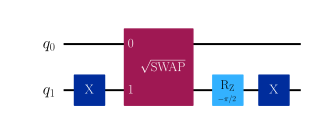

In [8]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZGate, SXdgGate, UnitaryGate

qc = QuantumCircuit(2)
qc.x(1)

sqrt_swap = np.array([
    [1, 0, 0, 0],
    [0, 0.5 + 0.5j, 0.5 - 0.5j, 0],
    [0, 0.5 - 0.5j, 0.5 + 0.5j, 0],
    [0, 0, 0, 1]
])
sqrt_swap_gate = UnitaryGate(sqrt_swap, label=r"$\sqrt{\text{SWAP}}$")
qc.append(sqrt_swap_gate, [0, 1])

qc.rz(-np.pi/2, 1)
qc.x(1)

qc.draw('mpl', style={
    "name": "iqx"
})

so that we have

$$
\begin{equation}
\begin{aligned}
\ket{00} &\mapsto \ket{01}\\
&\mapsto \frac{1}{\sqrt{2}} \left( e^{i\pi/4} \ket{01} + e^{-i\pi/4} \ket{10} \right)\\
&\mapsto \frac{1}{\sqrt{2}} \left( \ket{01} + \ket{10} \right)\\
&\mapsto \frac{1}{\sqrt{2}} \left( \ket{00} + \ket{11} \right)
\end{aligned}
\end{equation}
$$

## Problem 1-3 [20 points]

Spin review and intro to QuTiP. Please submit, $\textbf{via Canvas}$, a Jupyter notebook for this problem along with your pen/paper work.

The Hamiltonian for a spin-$1 / 2$ in a magnetic field, $\boldsymbol{B}$, is given by

$$
H=-\vec{\mu} \cdot \vec{B}=-\frac{1}{2} g \mu_B \vec{\sigma} \cdot \vec{B},
$$

where $g$ is the Landé g -factor, $\mu_B$ is the Bohr magneton, and $\vec{\sigma}=\left(\sigma_x, \sigma_y, \sigma_z\right)$ is a vector of Pauli spin operators.



### **a.  [1 points]**

Write down the matrix and outer product (ket-bra) representations of the three Pauli spin operators and the identity operator.

---

**Solution:**

$$
\begin{equation}
\begin{aligned}
\sigma_x &= 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
= \left.\ket{0}\!\bra{1}\right. + \left.\ket{1}\!\bra{0}\right. \\
\sigma_y &= 
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
= -i\left.\ket{0}\!\bra{1}\right. + i\left.\ket{1}\!\bra{0}\right. \\
\sigma_z &=
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
= \left.\ket{0}\!\bra{0}\right. - \left.\ket{1}\!\bra{1}\right. \\
\mathbb{I} &=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
= \left.\ket{0}\!\bra{0}\right. + \left.\ket{1}\!\bra{1}\right.
\end{aligned}
\end{equation}
$$

### **b.  [5 points]**

Find the expectation value of the spin projection, $\langle\vec{\sigma}\rangle=\left(\left\langle\sigma_x\right\rangle,\left\langle\sigma_y\right\rangle,\left\langle\sigma_z\right\rangle\right)$, for each of the following quantum states in (1) Dirac braket notation, (2) matrix notation, and (3) on QuTiP:

(i) $|\psi\rangle=|0\rangle$

(ii) $|\psi\rangle=(|0\rangle+|1\rangle) / \sqrt{2}$

(iii) $|\psi\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{2}(1+i)|1\rangle\right)$

---

#### **b1.**

$\ket{\psi} = \ket{0}$. $\langle\vec{\sigma}\rangle=\begin{pmatrix}
    0 & 0 & 1
  \end{pmatrix}^{\mathrm{T}}$.

1.  Dirac
   
    $$
    \begin{equation}
      \begin{aligned}
      \langle \sigma_x \rangle &= \langle 0 | 0 \rangle \langle 1 | 0 \rangle + \langle 0 | 1 \rangle \langle 0 | 0 \rangle 
      = \underbrace{\langle 0 | 0 \rangle \langle 1 | 0 \rangle}_{0} + \underbrace{\langle 0 | 1 \rangle \langle 0 | 0 \rangle}_{0} = 0 \\
      \langle \sigma_y \rangle &= -i \langle 0 | 0 \rangle \langle 1 | 0 \rangle + i \langle 0 | 1 \rangle \langle 0 | 0 \rangle 
      = -i \underbrace{\langle 0 | 0 \rangle \langle 1 | 0 \rangle}_{0} + i \underbrace{\langle 0 | 1 \rangle \langle 0 | 0 \rangle}_{0} = 0 \\
      \langle \sigma_z \rangle &= \langle 0 | 0 \rangle \langle 0 | 0 \rangle - \langle 0 | 1 \rangle \langle 1 | 0 \rangle 
      = \underbrace{\langle 0 | 0 \rangle \langle 0 | 0 \rangle}_{1} - \underbrace{\langle 0 | 1 \rangle \langle 1 | 0 \rangle}_{0} = 1
      \end{aligned}
    \end{equation}
    $$

2.  Matrix
   
    $$
    \begin{equation}
        \begin{aligned}
        \langle \sigma_x \rangle &= 
        \begin{pmatrix} 1 & 0 \end{pmatrix}
        \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
        \begin{pmatrix} 1 \\ 0 \end{pmatrix}
        = \begin{pmatrix} 1 & 0 \end{pmatrix}
        \begin{pmatrix} 0 \\ 1 \end{pmatrix}
        = 0 \\
        \langle \sigma_y \rangle &= 
        \begin{pmatrix} 1 & 0 \end{pmatrix}
        \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}
        \begin{pmatrix} 1 \\ 0 \end{pmatrix}
        = \begin{pmatrix} 1 & 0 \end{pmatrix}
        \begin{pmatrix} 0 \\ i \end{pmatrix}
        = 0 \\
        \langle \sigma_z \rangle &= 
        \begin{pmatrix} 1 & 0 \end{pmatrix}
        \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
        \begin{pmatrix} 1 \\ 0 \end{pmatrix}
        = \begin{pmatrix} 1 & 0 \end{pmatrix}
        \begin{pmatrix} 1 \\ 0 \end{pmatrix}
        = 1
        \end{aligned}
    \end{equation}
    $$

3. QuTiP

    See code below.

#### **b2.**

$|\psi\rangle=(|0\rangle+|1\rangle) / \sqrt{2}$. $\langle\vec{\sigma}\rangle=\begin{pmatrix}
    1 & 0 & 0
  \end{pmatrix}^{\mathrm{T}}$.

1. Dirac

    $$
    \begin{equation}
        \begin{aligned}
        \langle \sigma_x \rangle &= \frac{1}{2} \left( (\langle 0| + \langle 1|)(\ket{0}\bra{1} + \ket{1}\bra{0})(\ket{0} + \ket{1}) \right) \\
        &= \frac{1}{2} \left( \langle 0|0\rangle \langle 1|1\rangle + \langle 1|1\rangle \langle 0|0\rangle + 0 \right) = 1 \\[1em]
        \langle \sigma_y \rangle &= \frac{1}{2} \left( (\langle 0| + \langle 1|)(-i\ket{0}\bra{1} + i\ket{1}\bra{0})(\ket{0} + \ket{1}) \right) \\
        &= \frac{1}{2} \left( -i \langle 0|0\rangle \langle 1|1\rangle + i \langle 1|1\rangle \langle 0|0\rangle + 0 \right) = 0 \\[1em]
        \langle \sigma_z \rangle &= \frac{1}{2} \left( (\langle 0| + \langle 1|)(\ket{0}\bra{0} - \ket{1}\bra{1})(\ket{0} + \ket{1}) \right) \\
        &= \frac{1}{2} \left( \langle 0|0\rangle \langle 0|0\rangle - \langle 1|1\rangle \langle 1|1\rangle + 0 \right) = 0
        \end{aligned}
    \end{equation}
    $$                           

2. Matrix

    $$
    \begin{equation}
        \begin{aligned}
        \langle \sigma_x \rangle &= \frac{1}{2} 
        \begin{pmatrix} 1 & 1 \end{pmatrix}
        \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
        \begin{pmatrix} 1 \\ 1 \end{pmatrix}
        = \frac{1}{2} 
        \begin{pmatrix} 1 & 1 \end{pmatrix}
        \begin{pmatrix} 1 \\ 1 \end{pmatrix}
        = 1 \\
        \langle \sigma_y \rangle &= \frac{1}{2} 
        \begin{pmatrix} 1 & 1 \end{pmatrix}
        \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}
        \begin{pmatrix} 1 \\ 1 \end{pmatrix}
        = \frac{1}{2} 
        \begin{pmatrix} 1 & 1 \end{pmatrix}
        \begin{pmatrix} -i \\ i \end{pmatrix}
        = 0 \\
        \langle \sigma_z \rangle &= \frac{1}{2} 
        \begin{pmatrix} 1 & 1 \end{pmatrix}
        \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
        \begin{pmatrix} 1 \\ 1 \end{pmatrix}
        = \frac{1}{2} 
        \begin{pmatrix} 1 & 1 \end{pmatrix}
        \begin{pmatrix} 1 \\ -1 \end{pmatrix}
        = 0
        \end{aligned}
    \end{equation}
    $$

3. QuTiP

    See code below.

#### **b3.**

$|\psi\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{2}(1+i)|1\rangle\right)$. $\langle\vec{\sigma}\rangle=\begin{pmatrix}
    1/\sqrt{2} & 1/\sqrt{2} & 0
  \end{pmatrix}^{\mathrm{T}}$.

1. Dirac

    $$
    \begin{equation}
        \begin{aligned}
        \langle \sigma_x \rangle &= \left( \frac{1}{\sqrt{2}} \langle 0| + \frac{1 - i}{2} \langle 1| \right) 
        (\ket{0}\bra{1} + \ket{1}\bra{0}) 
        \left( \frac{1}{\sqrt{2}} \ket{0} + \frac{1 + i}{2} \ket{1} \right) \\
        &= \frac{1 + i}{2\sqrt{2}} \bra{0}0\rangle \bra{1}1\rangle 
        + \frac{1 - i}{2\sqrt{2}} \bra{1}1\rangle \bra{0}0\rangle + 0 
        = \frac{1 + i + 1 - i}{2\sqrt{2}} = \frac{1}{\sqrt{2}} \\
        \langle \sigma_y \rangle &= \left( \frac{1}{\sqrt{2}} \langle 0| + \frac{1 - i}{2} \langle 1| \right) 
        (-i\ket{0}\bra{1} + i\ket{1}\bra{0}) 
        \left( \frac{1}{\sqrt{2}} \ket{0} + \frac{1 + i}{2} \ket{1} \right) \\
        &= \frac{-i + 1}{2\sqrt{2}} \bra{0}0\rangle \bra{1}1\rangle 
        + \frac{i + 1}{2\sqrt{2}} \bra{1}1\rangle \bra{0}0\rangle + 0 
        = \frac{-i + 1 + i + 1}{2\sqrt{2}} = \frac{1}{\sqrt{2}} \\
        \langle \sigma_z \rangle &= \left( \frac{1}{\sqrt{2}} \langle 0| + \frac{1 - i}{2} \langle 1| \right) 
        (\ket{0}\bra{0} - \ket{1}\bra{1}) 
        \left( \frac{1}{\sqrt{2}} \ket{0} + \frac{1 + i}{2} \ket{1} \right) \\
        &= \frac{1}{2} \bra{0}0\rangle \bra{0}0\rangle 
        - \frac{(1 - i)(1 + i)}{4} \bra{1}1\rangle \bra{1}1\rangle + 0 \\
        &= \frac{1}{2} - \frac{2}{4} = 0
        \end{aligned}
    \end{equation}
    $$

2. Matrix

    $$
    \begin{equation}
    \begin{aligned}
    \langle \sigma_x \rangle &= \left( \frac{1}{\sqrt{2}} \cdot \frac{1 - i}{2} \right)
    \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
    \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1 + i}{2} \end{pmatrix} \\
    &= \left( \frac{1}{\sqrt{2}} \cdot \frac{1 - i}{2} \right)
    \begin{pmatrix} \frac{1 + i}{2} \\ \frac{1}{\sqrt{2}} \end{pmatrix}
    = \frac{1 + i + 1 - i}{2\sqrt{2}} = \frac{1}{\sqrt{2}} \\
    \langle \sigma_y \rangle &= \left( \frac{1}{\sqrt{2}} \cdot \frac{1 - i}{2} \right)
    \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}
    \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1 + i}{2} \end{pmatrix} \\
    &= \left( \frac{1}{\sqrt{2}} \cdot \frac{1 - i}{2} \right)
    \begin{pmatrix} \frac{-i(1 + i)}{2} \\ \frac{i}{\sqrt{2}} \end{pmatrix}
    = \frac{-i + 1 + i + 1}{2\sqrt{2}} = \frac{1}{\sqrt{2}} \\
    \langle \sigma_z \rangle &= \left( \frac{1}{\sqrt{2}} \cdot \frac{1 - i}{2} \right)
    \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
    \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1 + i}{2} \end{pmatrix} \\
    &= \left( \frac{1}{\sqrt{2}} \cdot \frac{1 - i}{2} \right)
    \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1 + i}{2} \end{pmatrix}
    = \frac{2 - (1 + 1)}{4} = 0
    \end{aligned}
    \end{equation}
    $$

3. QuTiP

    See code below.

**QuTiP approach**

In [3]:
# Define states and operators
def compute_expectation_values(states_dict):
    """Compute expectation values of Pauli operators for given quantum states."""
    # Create Pauli operators
    sx, sy, sz = sigmax(), sigmay(), sigmaz()

    results = {}
    for name, state in states_dict.items():
        results[name] = {
            "x": expect(sx, state),
            "y": expect(sy, state),
            "z": expect(sz, state),
        }
    return results


# Define computational basis states
ket0, ket1 = basis(2, 0), basis(2, 1)

# Define the states from the problem
states = {
    "psi1": ket0,
    "psi2": (ket0 + ket1).unit(),
    "psi3": (1 / np.sqrt(2) * ket0 + (1 + 1j) / 2 * ket1).unit(),
}

# Calculate expectation values
expect_vals = compute_expectation_values(states)

# Format results for display
latex_str = r"""
\begin{{align*}}
\text{{State }} |0\rangle :&\quad \langle \sigma_x \rangle = {:.1f},\quad \langle \sigma_y \rangle = {:.1f},\quad \langle \sigma_z \rangle = {:.1f} \\
\text{{State }} \frac{{|0\rangle + |1\rangle}}{{\sqrt{{2}}}} :&\quad \langle \sigma_x \rangle = {:.1f},\quad \langle \sigma_y \rangle = {:.1f},\quad \langle \sigma_z \rangle = {:.1f} \\
\text{{State }} \frac{{|0\rangle}}{{\sqrt{{2}}}} + \frac{{(1+i)|1\rangle}}{{2}} :&\quad \langle \sigma_x \rangle = {:.1f},\quad \langle \sigma_y \rangle = {:.1f},\quad \langle \sigma_z \rangle = {:.1f}
\end{{align*}}
""".format(
    expect_vals["psi1"]["x"],
    expect_vals["psi1"]["y"],
    expect_vals["psi1"]["z"],
    expect_vals["psi2"]["x"],
    expect_vals["psi2"]["y"],
    expect_vals["psi2"]["z"],
    expect_vals["psi3"]["x"],
    expect_vals["psi3"]["y"],
    expect_vals["psi3"]["z"],
)

display(Latex(latex_str))

<IPython.core.display.Latex object>

### **c.  [3 points]**

Plot the three states above on the Bloch sphere using QuTiP.

---

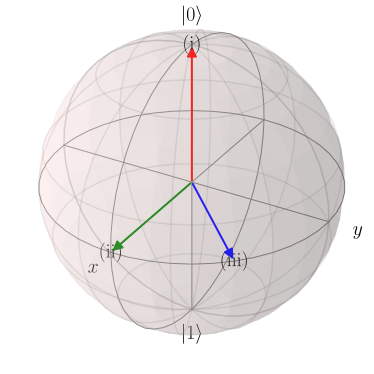

In [4]:
def plot_states_on_bloch_sphere(states_dict):
    """Plot quantum states on the Bloch sphere with annotations."""
    b = Bloch()

    # Extract states and prepare annotations
    state_list = list(states_dict.values())
    annotations = ["(i)", "(ii)", "(iii)"]

    # Add states to Bloch sphere
    b.add_states(state_list)
    b.vector_color = ["r", "g", "b"]
    b.vector_width = 2

    # Add annotations
    for i, state in enumerate(state_list):
        b.add_annotation(state, annotations[i])

    return b


# Plot our states on the Bloch sphere
bloch = plot_states_on_bloch_sphere(states)
bloch.show()

### **d. [3 points]**

Evaluate the spin Hamiltonian in matrix form assuming the magnetic field points along the $x$ direction, $\vec{B}=\left(B_x, 0,0\right)$. Find its eigenvalues and the corresponding eigenvectors.

---

**Solution:**

$$
\begin{equation}
H = -\vec{\mu} \cdot \vec{B} = -\frac{1}{2} g \mu_B \vec{\sigma} \cdot \vec{B} = 
-\frac{1}{2} g \mu_B B_x \sigma_x = 
-\frac{1}{2} g \mu_B B_x 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}.
\end{equation}
$$

Finding the eigenvalues and eigenvectors of this Hamiltonian means finding them for $\sigma_x$. Since $\sigma_x^2 = \mathbb{I}$, its eigenvalues must be $\pm 1$, because, if $\lambda$ is an eigenvalue to eigenvector $\ket{\psi_\lambda}$:

$$
\begin{equation}
\ket{\psi_\lambda} = \sigma_x^2 \ket{\psi_\lambda} 
= \sigma_x \lambda \ket{\psi_\lambda} 
= \lambda^2 \ket{\psi_\lambda} 
\Rightarrow \lambda = \pm 1.
\end{equation}
$$

Solving the linear equations

$$
\begin{equation}
\lambda = 1 \colon \quad \sigma_x \ket{\psi_1} = \ket{\psi_1}
\end{equation}
$$

$$
\begin{equation}
\lambda = -1 \colon \quad \sigma_x \ket{\psi_{-1}} = -\ket{\psi_{-1}}
\end{equation}
$$

yields the normalized eigenstates:

$$
\begin{equation}
\lambda = 1 \colon \quad \ket{\psi_1} = \frac{1}{\sqrt{2}} 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
\equiv \ket{+} = \ket{X}
\end{equation}
$$

$$
\begin{equation}
\lambda = -1 \colon \quad \ket{\psi_{-1}} = \frac{1}{\sqrt{2}} 
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
\equiv \ket{-} = \ket{-X}
\end{equation}
$$

Therefore, the Hamiltonian’s eigenstates and eigenenergies are:

$$
\begin{equation}
E_1 = -\frac{1}{2} g \mu_B B_x \colon \quad 
\ket{\psi_1} = \frac{1}{\sqrt{2}} 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
\end{equation}
$$

$$
\begin{equation}
E_2 = \frac{1}{2} g \mu_B B_x \colon \quad 
\ket{\psi_2} = \frac{1}{\sqrt{2}} 
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
\end{equation}
$$

### **e. [4 points]**

Now define the spin Hamiltonian in QuTiP and use it to find the eigenvalues and eigenvectors. For this, use natural units (set $h=1$ such that your Hamiltonian takes on units of frequency (not radial frequency!) instead of energy), let $g=2, \mu_B=1.4$ $\mathrm{MHz} /$ gauss, and $B_x=200$ gauss.

---

In [5]:
def construct_spin_hamiltonian(g, mu_B, B_field):
    """Construct spin-1/2 Hamiltonian in a magnetic field: H = -½ g μB B·σ."""
    return -0.5 * g * mu_B * B_field * sigmax()


def analyze_hamiltonian(hamiltonian):
    """Analyze a Hamiltonian by computing eigenvalues and eigenstates."""
    # Diagonalize the Hamiltonian
    evals, ekets = hamiltonian.eigenstates()

    # Display Hamiltonian
    print("Hamiltonian matrix:")
    print(hamiltonian)

    # Display eigenvalues
    print("\nEnergy eigenvalues:")
    for i, val in enumerate(evals):
        state_type = "Ground state" if val < 0 else "Excited state"
        print(f"{state_type}: {val:.2f} MHz")

    # Display eigenvectors
    print("\nEigenvectors (in the computational basis |0⟩, |1⟩):")
    for i, vec in enumerate(ekets):
        state_type = "Ground state" if evals[i] < 0 else "Excited state"
        print(f"\n{state_type} eigenvector:")
        print(vec)

        vec_data = vec.full().flatten()
        vec_str = f"{vec_data[0]:.5f}|0⟩ + {vec_data[1]:.5f}|1⟩"
        print(f"In ket notation: {vec_str}")

        # Add theoretical expression
        if np.isclose(abs(vec_data[0]), 1 / np.sqrt(2)) and np.isclose(
            abs(vec_data[1]), 1 / np.sqrt(2)
        ):
            sign = "+" if vec_data[0] * vec_data[1] > 0 else "-"
            print(f"Theoretical form: 1/√2(|0⟩ {sign} |1⟩)")

    # Calculate the energy gap
    energy_gap = abs(evals[1] - evals[0])
    print(f"\nEnergy gap between levels: {energy_gap:.2f} MHz")
    return evals, ekets, energy_gap


# Parameters (in natural units: h = 1, output in MHz)
PARAMS = {
    "g": 2.0,  # Landé g-factor
    "mu_B": 1.4,  # Bohr magneton in MHz/G
    "B_x": 200,  # Magnetic field in Gauss
}

# Construct and analyze the Hamiltonian
H = construct_spin_hamiltonian(PARAMS["g"], PARAMS["mu_B"], PARAMS["B_x"])
evals, ekets, energy_gap = analyze_hamiltonian(H)

# Verify energy gap matches theory
theoretical_gap = PARAMS["g"] * PARAMS["mu_B"] * PARAMS["B_x"]
print(f"This equals g*μB*B = {theoretical_gap:.2f} MHz")

Hamiltonian matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[   0. -280.]
 [-280.    0.]]

Energy eigenvalues:
Ground state: -280.00 MHz
Excited state: 280.00 MHz

Eigenvectors (in the computational basis |0⟩, |1⟩):

Ground state eigenvector:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.70710678]
 [-0.70710678]]
In ket notation: -0.70711+0.00000j|0⟩ + -0.70711+0.00000j|1⟩
Theoretical form: 1/√2(|0⟩ + |1⟩)

Excited state eigenvector:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.70710678]
 [ 0.70710678]]
In ket notation: -0.70711+0.00000j|0⟩ + 0.70711+0.00000j|1⟩
Theoretical form: 1/√2(|0⟩ - |1⟩)

Energy gap between levels: 560.00 MHz
This equals g*μB*B = 560.00 MHz


### **f. [4 points]**

Using QuTiP, plot the spectrum (i.e. the eigenenergies) as a function of the magnetic field strength $B_x$. Make sure that your axes are labeled and have units.

---

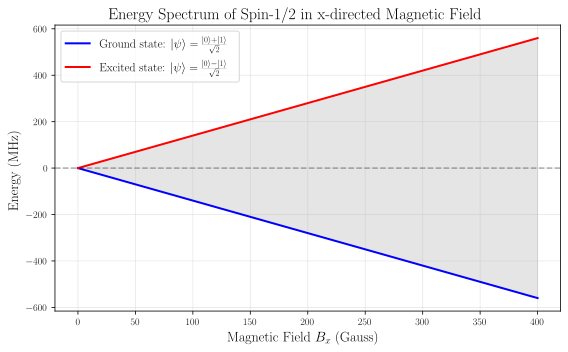

In [6]:
def plot_energy_spectrum(g, mu_B, B_range, num_points=100):
    """Plot energy spectrum of spin-1/2 in magnetic field as function of field strength."""
    # Create an array of magnetic field values
    B_values = np.linspace(B_range[0], B_range[1], num_points)

    # Calculate eigenvalues for each B value
    eigenvalues = np.zeros((len(B_values), 2))
    for i, B in enumerate(B_values):
        H_B = construct_spin_hamiltonian(g, mu_B, B)
        eigenvalues[i, :] = H_B.eigenenergies()

    # Plot the results
    plt.figure(figsize=(8, 5))

    # Ground state
    plt.plot(
        B_values,
        eigenvalues[:, 0],
        "b-",
        linewidth=2,
        label=r"Ground state: $\ket{\psi} = \frac{\ket{0} + \ket{1}}{\sqrt{2}}$",
    )

    # Excited state
    plt.plot(
        B_values,
        eigenvalues[:, 1],
        "r-",
        linewidth=2,
        label=r"Excited state: $\ket{\psi} = \frac{\ket{0} - \ket{1}}{\sqrt{2}}$",
    )

    # Styling
    plt.xlabel("Magnetic Field $B_x$ (Gauss)", fontsize=14)
    plt.ylabel("Energy (MHz)", fontsize=14)
    plt.title("Energy Spectrum of Spin-1/2 in x-directed Magnetic Field", fontsize=16)
    plt.axhline(y=0, color="k", linestyle="--", alpha=0.3)
    plt.fill_between(
        B_values, eigenvalues[:, 0], eigenvalues[:, 1], color="gray", alpha=0.2
    )
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return plt


# Plot the energy spectrum for field range 0-400 Gauss
plot_energy_spectrum(PARAMS["g"], PARAMS["mu_B"], [0, 400], 100)
plt.show()